In [13]:
import pandas as pd
# Прочитати CSV файл
df = pd.read_csv('2017_jun_final.csv')

# Вивести перші рядки таблиці
print(df.head())

   N                    Посада Мова програмування Спеціалізація  \
0  1        Junior QA engineer                NaN     Manual QA   
1  2        Junior QA engineer                NaN     Manual QA   
2  3         Software Engineer            C#/.NET           NaN   
3  4         Software Engineer         JavaScript           NaN   
4  5  Senior Software Engineer         JavaScript           NaN   

  Загальний досвід роботи Досвід роботи на поточному місці  \
0                     0.5                              0.5   
1         менше 3 місяців                  менше 3 місяців   
2                       4                                1   
3                       5                                4   
4       10 і більше років                              0.5   

   Зарплата на місяць  Зміна зарплати за 12 місяців   Місто   Розмір компанії  \
0                 400                             0  Харків        до 10 осіб   
1                 430                           130  Харків  б

In [14]:
print(df.shape)

(8704, 25)


In [15]:
print(df.dtypes)

N                                     int64
Посада                               object
Мова програмування                   object
Спеціалізація                        object
Загальний досвід роботи              object
Досвід роботи на поточному місці     object
Зарплата на місяць                    int64
Зміна зарплати за 12 місяців          int64
Місто                                object
Розмір компанії                      object
Тип компанії                         object
Стать                                object
Вік                                   int64
Освіта                               object
Університет                          object
Ще студент                             bool
Рівень англійської                   object
Предметна область                    object
Дата заповнення                      object
User.Agent                           object
exp                                 float64
current_job_exp                     float64
salary                          

In [16]:
# Порахувати частку пропусків у кожній колонці
missing_data = df.isnull().sum() / len(df) * 100
print(missing_data)

N                                    0.000000
Посада                               0.000000
Мова програмування                  44.232537
Спеціалізація                       82.938879
Загальний досвід роботи              0.000000
Досвід роботи на поточному місці     0.000000
Зарплата на місяць                   0.000000
Зміна зарплати за 12 місяців         0.000000
Місто                                0.000000
Розмір компанії                      0.000000
Тип компанії                         0.000000
Стать                                0.000000
Вік                                  0.000000
Освіта                               0.000000
Університет                          4.113051
Ще студент                           0.000000
Рівень англійської                   0.000000
Предметна область                    2.562040
Дата заповнення                      0.000000
User.Agent                           0.000000
exp                                  0.000000
current_job_exp                   

In [17]:
# Видалити стовпці з пропусками, крім "Мова програмування"
df_filtered = df[['Мова програмування']].copy()

# Перевірити частку пропусків після видалення стовпців
missing_data_filtered = df_filtered.isnull().sum() / len(df_filtered) * 100
print(missing_data_filtered)

Мова програмування    44.232537
dtype: float64


In [18]:
# Видалити рядки з пропусками
df_clean = df_filtered.dropna()

# Визначити новий розмір таблиці
print(df_clean.shape)

(4854, 1)


In [19]:
# Створити нову таблицю python_data
python_data = df_clean[df_clean['Мова програмування'] == 'Python']

# Визначити розмір таблиці python_data
print(python_data.shape)

(207, 1)


In [21]:
# Групування за стовпчиком "Посада"
grouped = df.groupby('Посада') 

# Агрегація даних для стовпчика "Зарплата в місяць"
salary_stats = grouped['Зарплата на місяць'].agg(['min', 'max'])
print(salary_stats)

                                             min    max
Посада                                                 
Business analyst                             200   5000
DBA                                          380   6000
Data Scientist / Data Analyst                150   8000
Designer                                     100   4000
DevOps                                       194  10000
Director of Engineering / Program Director  1500  34000
ERP / CRM                                    100   6000
Game designer                                150   6800
HR                                           100   7000
HTML coder                                   154   3000
Junior QA engineer                            96   2000
Junior Software Engineer                      75   2600
Marketing                                    100   4000
Product Manager                              250   5000
Project manager                              190   8000
QA Tech Lead                                 430

In [31]:
# Функція для знаходження середньої зарплати
df_new = df.groupby(['Посада'])['Зарплата на місяць'].agg(['min', 'max'])
def fill_avg_salary(salary):
    return salary.mean()

df_new['avg'] = df_new.apply(fill_avg_salary, axis=1)
df_new

,min,max,avg
Посада,,,
Business analyst,200,5000,2600.0
DBA,380,6000,3190.0
Data Scientist / Data Analyst,150,8000,4075.0
Designer,100,4000,2050.0
DevOps,194,10000,5097.0
Director of Engineering / Program Director,1500,34000,17750.0
ERP / CRM,100,6000,3050.0
Game designer,150,6800,3475.0
HR,100,7000,3550.0


In [27]:
# Зберегти отриману таблицю в CSV файл
df.to_csv('cleaned_2017_final.csv', index=False)

# Візуалізація

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


Гістограма розподілу зарплат

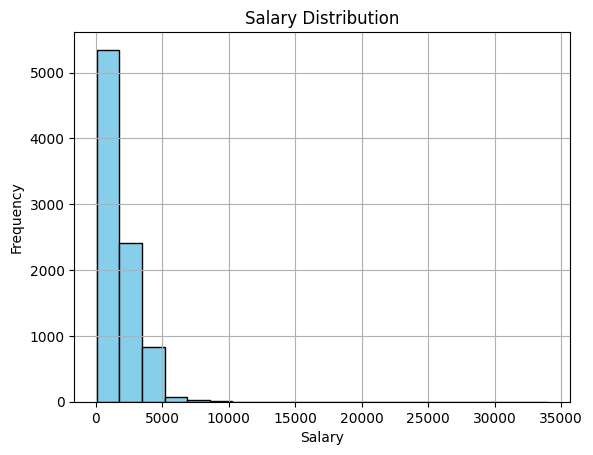

In [36]:
from matplotlib import pyplot as plt


df['Зарплата на місяць'].hist(bins=20, color='skyblue', edgecolor='black')
plt.title('Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()


Лінійний графік середньої зарплати за посадою



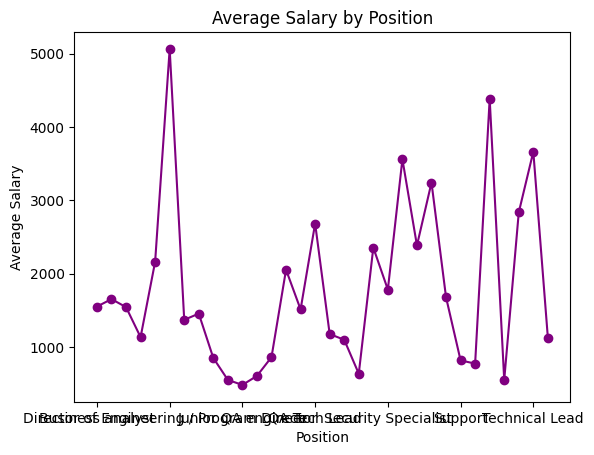

In [37]:
avg_salary = df.groupby('Посада')['Зарплата на місяць'].mean()
avg_salary.plot(kind='line', marker='o', color='purple')
plt.title('Average Salary by Position')
plt.xlabel('Position')
plt.ylabel('Average Salary')
plt.show()


Кругова діаграма за посадами

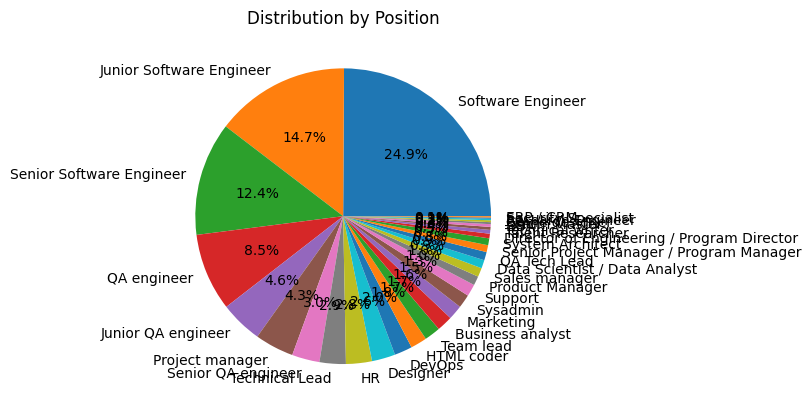

In [40]:
position_counts = df['Посада'].value_counts()
position_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution by Position')
plt.ylabel('')
plt.show()


Boxplot для зарплат за посадами



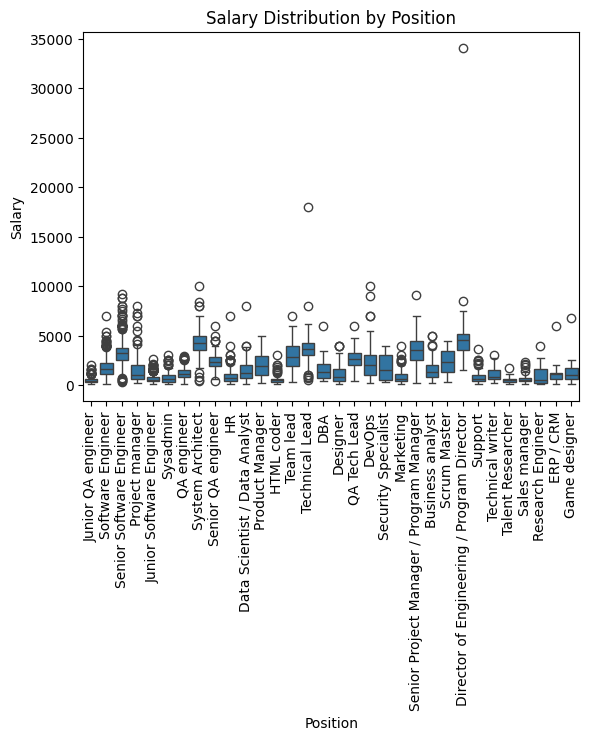

In [41]:
sns.boxplot(x='Посада', y='Зарплата на місяць', data=df)
plt.xticks(rotation=90)
plt.title('Salary Distribution by Position')
plt.xlabel('Position')
plt.ylabel('Salary')
plt.show()
